### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [3]:
lista_edad_altura = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58]]
print(lista_edad_altura)

[[29, 1.66], [22, 1.83], [31, 1.8], [27, 1.75], [22, 1.82], [35, 1.79], [34, 1.9], [26, 1.78], [26, 1.64], [23, 1.74], [24, 1.85], [28, 1.75], [23, 1.83], [32, 1.74], [34, 1.57], [27, 1.58]]


In [4]:
X = []
y = []
for i in range(len(lista_edad_altura)):
    X.append(lista_edad_altura[i][0])
    y.append(lista_edad_altura[i][1])
print(X)
print(y)

[29, 22, 31, 27, 22, 35, 34, 26, 26, 23, 24, 28, 23, 32, 34, 27]
[1.66, 1.83, 1.8, 1.75, 1.82, 1.79, 1.9, 1.78, 1.64, 1.74, 1.85, 1.75, 1.83, 1.74, 1.57, 1.58]


In [5]:
X = np.array(X)
y = np.array(y) 

In [6]:
X = X.reshape(-1, 1)
X.shape

(16, 1)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []

def plot_learning_curves(model, X, Y):
    # 80% de Train
    # 20% de Test
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    
    for m in range(1, len(X_train)):  # Incremental
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
        if m < 4:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

##### ITERACIÓN 1 #####
x [[26]]
y [1.78]
y_train_predict [1.78]
-----
X_val
 [[23]
 [35]
 [29]
 [23]]
y_val_predict [1.78 1.78 1.78 1.78]
##### ITERACIÓN 2 #####
x [[26]
 [27]]
y [1.78 1.58]
y_train_predict [1.78 1.58]
-----
X_val
 [[23]
 [35]
 [29]
 [23]]
y_val_predict [ 2.38 -0.02  1.18  2.38]
##### ITERACIÓN 3 #####
x [[26]
 [27]
 [34]]
y [1.78 1.58 1.9 ]
y_train_predict [1.67438596 1.70070175 1.88491228]
-----
X_val
 [[23]
 [35]
 [29]
 [23]]
y_val_predict [1.5954386  1.91122807 1.75333333 1.5954386 ]


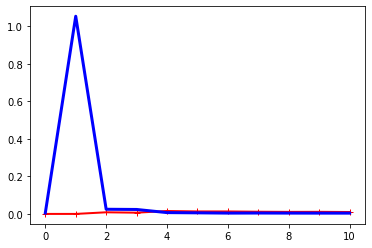

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

In [9]:
b = lin_reg.coef_ 
b

array([-0.00341954])

In [10]:
a = lin_reg.intercept_
a

1.8403160919540231

In [11]:
# ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [12]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 6.162975822039155e-31, 0.008650292397660821, 0.006584838709677407, 0.015600789473684198, 0.013253135313531346, 0.013140565198041826, 0.011685424710424705, 0.010868897777777777, 0.011190384884534641, 0.010182262277951932]
val_errors

 [0.004650000000000008, 1.0546499999999992, 0.024831101877500747, 0.023744405827263244, 0.006986076004155127, 0.005747179198117825, 0.00431694689492533, 0.00468932969097062, 0.004350296640000007, 0.0041750463629280695, 0.004134003005681069]


In [13]:
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1)
    return model.predict(to_predict)

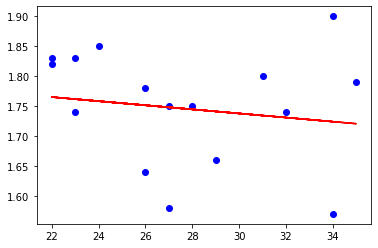

In [14]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

In [15]:
# ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
# No, son datos que no siguen una tendencia perfecta linear. Lo ideal sería tener muchísimos más datos.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1, 1)
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [17]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 0.015319214876033065
RMSE: 0.12377081593022268


In [18]:
X = X.reshape(16)
d = {'Age':X,'Height':y}
df = pd.DataFrame(d)
df

,Age,Height
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82
5,35,1.79
6,34,1.90
7,26,1.78
8,26,1.64
9,23,1.74


<AxesSubplot:>

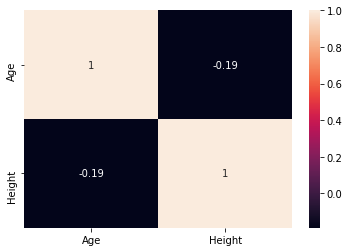

In [19]:
# Representa la matriz de correlación, ¿los datos están correlacionados?
sns.heatmap(df.corr(), annot = True)

In [24]:
# ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?
for i in range(len(y)):
    y[i] = y[i]*2
y

array([3.32, 3.66, 3.6 , 3.5 , 3.64, 3.58, 3.8 , 3.56, 3.28, 3.48, 3.7 ,
       3.5 , 3.66, 3.48, 3.14, 3.16])

In [26]:
X = X.reshape(-1, 1)

##### ITERACIÓN 1 #####
x [[22]]
y [3.64]
y_train_predict [3.64]
-----
X_val
 [[23]
 [35]
 [32]
 [34]]
y_val_predict [3.64 3.64 3.64 3.64]
##### ITERACIÓN 2 #####
x [[22]
 [28]]
y [3.64 3.5 ]
y_train_predict [3.64 3.5 ]
-----
X_val
 [[23]
 [35]
 [32]
 [34]]
y_val_predict [3.61666667 3.33666667 3.40666667 3.36      ]
##### ITERACIÓN 3 #####
x [[22]
 [28]
 [34]]
y [3.64 3.5  3.8 ]
y_train_predict [3.56666667 3.64666667 3.72666667]
-----
X_val
 [[23]
 [35]
 [32]
 [34]]
y_val_predict [3.58       3.74       3.7        3.72666667]


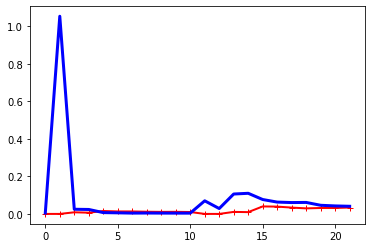

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

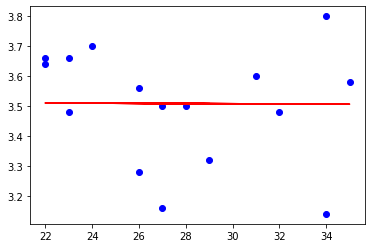

In [28]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

In [30]:
for i in range(len(y)):
    y[i] = y[i]/2

for i in range(len(y)):
    X[i] = X[i]*2

X

array([[58],
       [44],
       [62],
       [54],
       [44],
       [70],
       [68],
       [52],
       [52],
       [46],
       [48],
       [56],
       [46],
       [64],
       [68],
       [54]])

##### ITERACIÓN 1 #####
x [[56]]
y [1.75]
y_train_predict [1.75]
-----
X_val
 [[58]
 [70]
 [44]
 [48]]
y_val_predict [1.75 1.75 1.75 1.75]
##### ITERACIÓN 2 #####
x [[56]
 [54]]
y [1.75 1.58]
y_train_predict [1.75 1.58]
-----
X_val
 [[58]
 [70]
 [44]
 [48]]
y_val_predict [1.92 2.94 0.73 1.07]
##### ITERACIÓN 3 #####
x [[56]
 [54]
 [54]]
y [1.75 1.58 1.75]
y_train_predict [1.75  1.665 1.665]
-----
X_val
 [[58]
 [70]
 [44]
 [48]]
y_val_predict [1.835 2.345 1.24  1.41 ]


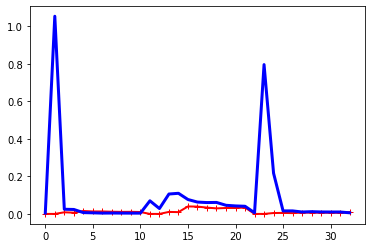

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(model=lin_reg, X=X, Y=y)

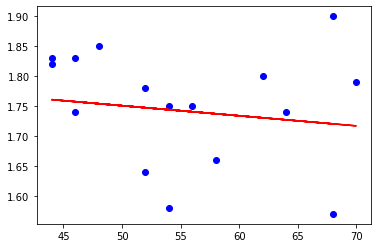

In [32]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

In [34]:
b = lin_reg.coef_ 
a = lin_reg.intercept_
print('a', a, '\n\nb', b)

a 1.8348524762908323 

b [-0.00168335]
